In [64]:
import matplotlib.pyplot as plt 
import xarray as xr
import xarray.ufuncs as xu
import pandas as pd 
import numpy as np
import cartopy.crs as ccrs
import wrf as wrf
import netCDF4 as nc
import os
import dask
from IPython.display import Image 


ds = xr.open_dataset('compress_wrfout_d03_2006-12-31_00 00 00') # loading data into xarray

### Aim: reproduce results from the AGORA report as a disgnostic check on process and workflow. 

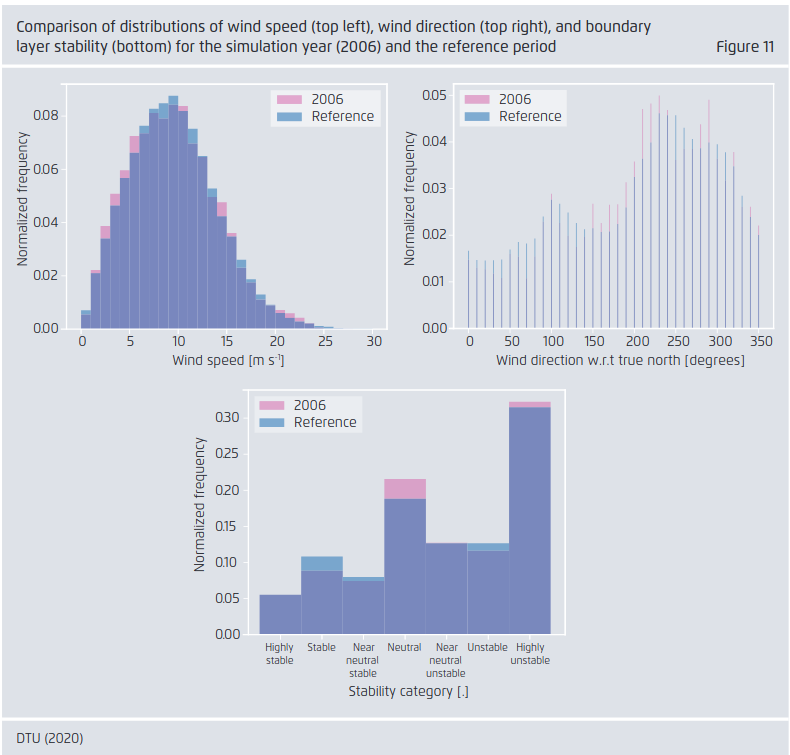

In [69]:
Image('/home/minz/Pictures/Screenshot from 2021-02-11 16-39-36.png')

### Extract U and V wind speeds from 31 Dec nc file 

In [2]:
U = ds['U'][:,:,:,:] # west east wind speed 
V = ds['V'][:,:,:,:] # south north wind speed

nx = np.shape(U)[3] - 1 # west - east dimensions
ny = np.shape(V)[2] - 1 # south - north dimensions
nz = np.shape(U)[1]     # bottom - top dimensions
time = np.shape(U)[0]   # time dimension

In [14]:
U

<xarray.DataArray 'U' (Time: 24, bottom_top: 26, south_north: 261, west_east_stag: 310)>
[50487840 values with dtype=float32]
Dimensions without coordinates: Time, bottom_top, south_north, west_east_stag
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  x-wind component
    units:        m s-1
    stagger:      X
    coordinates:  XLONG_U XLAT_U XTIME

In [4]:
V

<xarray.DataArray 'V' (Time: 24, bottom_top: 26, south_north_stag: 262, west_east: 309)>
[50517792 values with dtype=float32]
Dimensions without coordinates: Time, bottom_top, south_north_stag, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  y-wind component
    units:        m s-1
    stagger:      Y
    coordinates:  XLONG_V XLAT_V XTIME

### Process
1. Destagger U and V to common mass point 
2. Rename axes
3. Calculate wind speeds with destaggered U and V.
4. Calculate wind directions with destaggered U and V.
5. Plot diagnostic maps

In [36]:
# de-staggering the U and V dataArray
# to common mass point from cell boundaries 

U_destaggered = 0.5 * (U[:,:,:,0:nx] + U[:,:,:,1:nx+1]) # averageing values over west east stag
V_destaggered = 0.5 * (V[:,:,0:ny,:] + V[:,:,1:ny+1,:]) # averageing values over south north stag

# renaming axes 
U_destaggered = U_destaggered.rename({'bottom_top':'Zaxis',
                    'west_east_stag':'Xaxis','south_north':'Yaxis'})
V_destaggered = V_destaggered.rename({'bottom_top':'Zaxis',
                    'west_east':'Xaxis', 'south_north_stag':'Yaxis'})

wind_speeds_destaggered = xu.sqrt(U_destaggered**2 + V_destaggered**2) # wind speeds on common mass point

wind_directions_destaggered = xu.arctan(U_destaggered/V_destaggered) # wind directions on common mass point

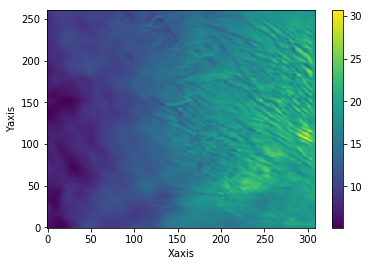

In [28]:
check = Wind_speeds_destaggered - V_destaggered # check to determine windspeed operation was actually performed
check.sel(Time = 10, Zaxis = 10).plot()

Text(0.5,1,'V_staggered ')

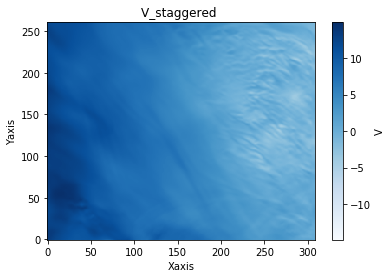

In [61]:
V_destaggered.sel(Time = 13, Zaxis = 6).plot(cmap=plt.cm.Blues)
plt.title('V_staggered ')

Text(0.5,1,'U_staggered ')

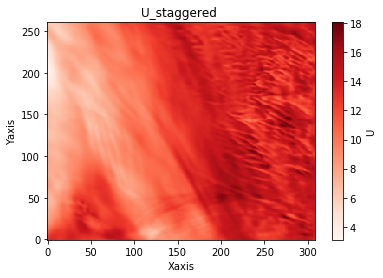

In [62]:
U_destaggered.sel(Time = 13, Zaxis = 6).plot(cmap=plt.cm.Reds)
plt.title('U_staggered ')

Text(0.5,1,'wind_speed_staggered ')

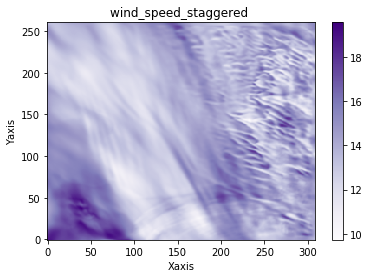

In [63]:
Wind_speeds_destaggered.sel(Time = 13, Zaxis = 6).plot(cmap=plt.cm.Purples)
plt.title('wind_speed_staggered ')

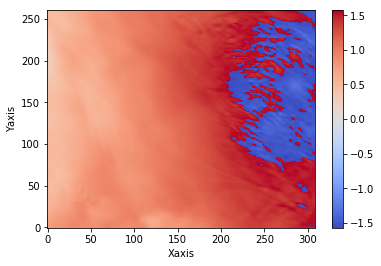

In [51]:
wind_directions_destaggered.sel(Time = 13, Zaxis = 6).plot(cmap=plt.cm.coolwarm)